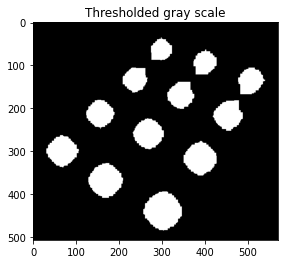

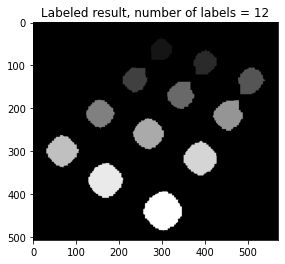

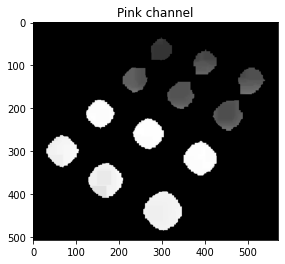

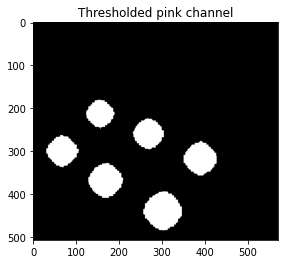

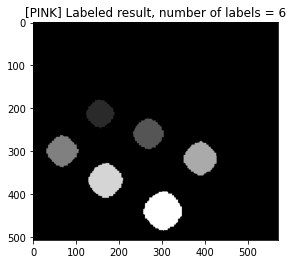

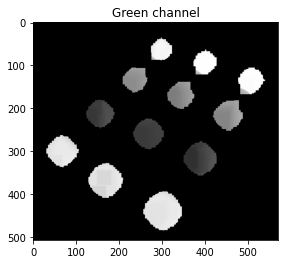

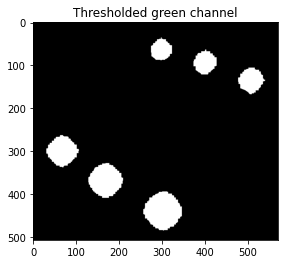

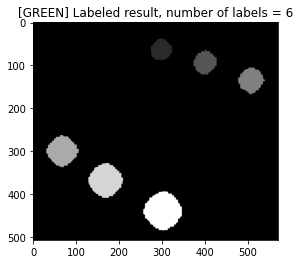

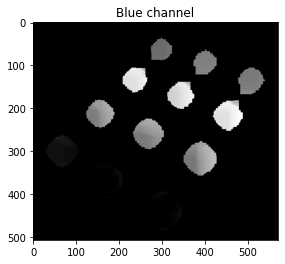

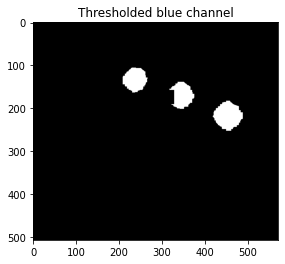

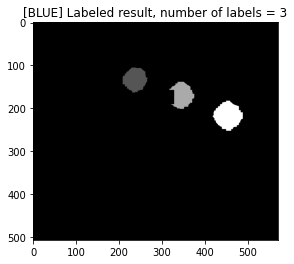

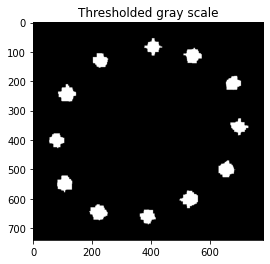

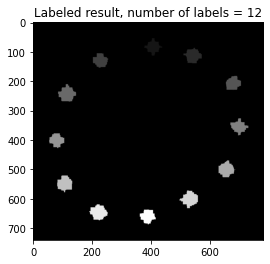

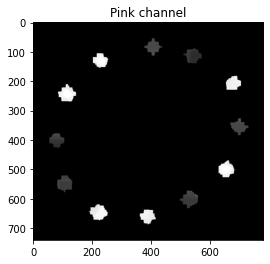

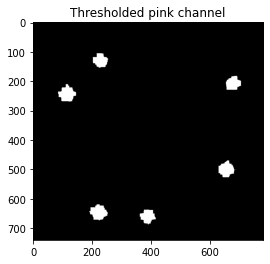

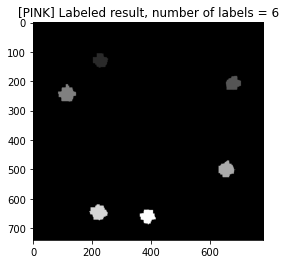

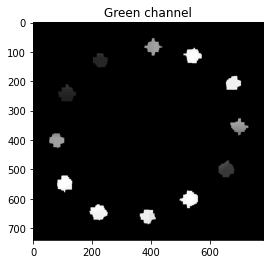

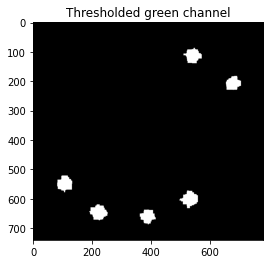

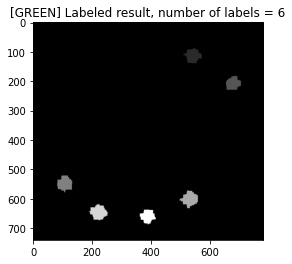

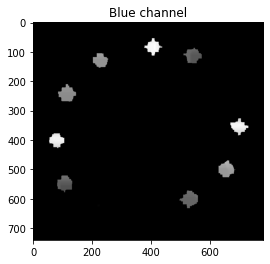

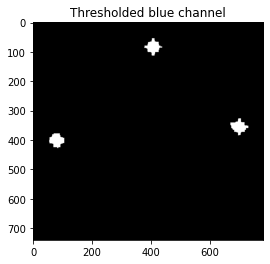

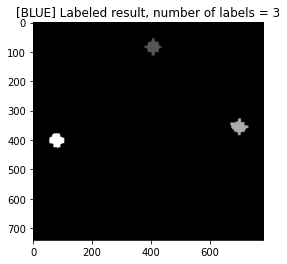

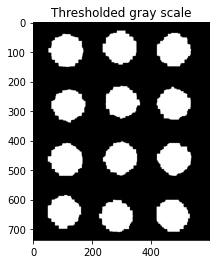

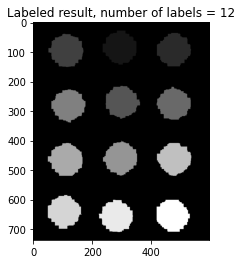

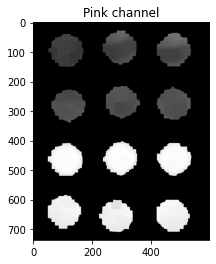

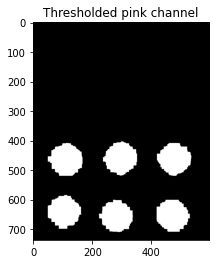

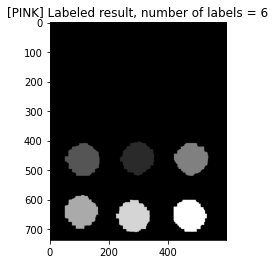

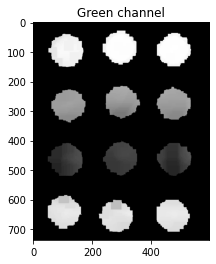

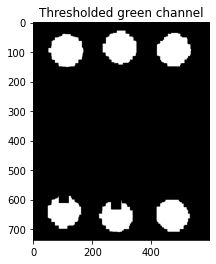

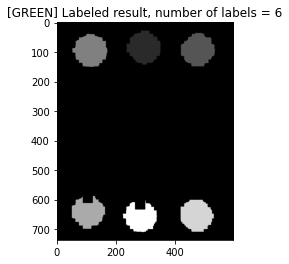

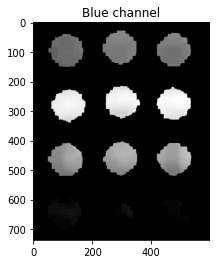

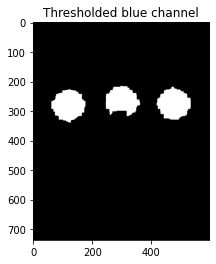

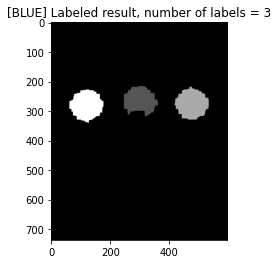

(12, 6, 6, 3)
(12, 6, 6, 3)
(12, 6, 6, 3)
pingpong1: (PINK, GREEN, BLUE, YELLOW) = (3, 3, 3, 3)
pingpong2: (PINK, GREEN, BLUE, YELLOW) = (3, 3, 3, 3)
pingpong3: (PINK, GREEN, BLUE, YELLOW) = (3, 3, 3, 3)


In [ ]:
# Author: Phatcharapon Jumruspun
# ID: 6031040921
# Email: p.jumruspun@gmail.com

import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1) Get input image as BGR
pong1 = cv2.imread("pingpong1.PNG")
pong2 = cv2.imread("pingpong2.PNG")
pong3 = cv2.imread("pingpong3.PNG")

def show(img, title=""):
  plt.imshow(img, cmap='gray')
  plt.title(title)
  plt.show()

def count(img, erode=33):
  # 2) Convert BGR input to RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # 3) Fill the background
  h, w = img_rgb.shape[:2]
  mask = np.zeros((h+2, w+2), np.uint8)
  cv2.floodFill(img_rgb, mask, (0, 0), (0,0,0))

  # 4) Erode to get rid of unwanted edges and noises
  kernel = np.ones((erode, erode), np.uint8)
  erosion = cv2.erode(img_rgb,kernel,iterations = 1)

  # 5) Counting
  #   5.1) Count total pingpongs
  gray = cv2.cvtColor(erosion, cv2.COLOR_RGB2GRAY)
  ret, thresh_gray = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
  show(thresh_gray, "Thresholded gray scale")

  # no_labels = number of total pingpongs
  connected = cv2.connectedComponentsWithStats(thresh_gray, 8, cv2.CV_32S)
  no_labels = connected[0] - 1 
  show(connected[1], f"Labeled result, number of labels = {no_labels}")

  #   5.2) Count by each channel (pink, green, blue)
  pink = erosion[:,:,0]
  show(pink, "Pink channel")
  ret, thresh_pink = cv2.threshold(pink, 150, 255, cv2.THRESH_BINARY)
  show(thresh_pink, "Thresholded pink channel")
  connected = cv2.connectedComponentsWithStats(thresh_pink, 8, cv2.CV_32S)
  no_labels_pink = connected[0] - 1 
  show(connected[1], f"[PINK] Labeled result, number of labels = {no_labels_pink}")

  green = erosion[:,:,1]
  show(green, "Green channel")
  ret, thresh_green = cv2.threshold(green, 200, 255, cv2.THRESH_BINARY)
  show(thresh_green, "Thresholded green channel")
  connected = cv2.connectedComponentsWithStats(thresh_green, 8, cv2.CV_32S)
  no_labels_green = connected[0] - 1 
  show(connected[1], f"[GREEN] Labeled result, number of labels = {no_labels_green}")

  blue = erosion[:,:,2]
  show(blue, "Blue channel")
  ret, thresh_blue = cv2.threshold(blue, 200, 255, cv2.THRESH_BINARY)
  show(thresh_blue, "Thresholded blue channel")
  connected = cv2.connectedComponentsWithStats(thresh_blue, 8, cv2.CV_32S)
  no_labels_blue = connected[0] - 1 
  show(connected[1], f"[BLUE] Labeled result, number of labels = {no_labels_blue}")

  print("===========================================")
  return (no_labels, no_labels_pink, no_labels_green, no_labels_blue)

def calculate(labels):
  # 6) Extract yellow by checking if sum(pink, green, blue) > all
  (all, pink, green, blue) = labels

  # if pink+green+blue > all, then there is yellow
  # which comes from combining pink and green channels
  yellow = 0
  if pink + green + blue > all:
    while pink + green + blue + yellow != all:
      pink -= 1
      green -=1
      yellow += 1

  return (pink, green, blue, yellow)

ans1 = count(pong1)
ans2 = count(pong2, erode=71)
ans3 = count(pong3)

print(ans1)
print(ans2)
print(ans3)

print(f"pingpong1: (PINK, GREEN, BLUE, YELLOW) = {calculate(ans1)}")
print(f"pingpong2: (RED, GREEN, BLUE, YELLOW) = {calculate(ans2)}")
print(f"pingpong3: (RED, GREEN, BLUE, YELLOW) = {calculate(ans3)}")